In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
import itertools
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('DataMineríaCSV/Nacimientos.csv')
df = df.drop('Área_Geográfica', axis=1)
df = df.drop('Año_Ocurrencia', axis=1)

rows = (df.Año_Registro == 9.0)

# update dataframe
df.loc[df["Año_Registro"] == 9.0, "Año_Registro"] = 2009.0
df.loc[df["Año_Registro"] == 10.0, "Año_Registro"] = 2010.0

In [4]:
from sklearn.linear_model import LinearRegression

births = df.groupby(df.Año_Registro).count()
births = births.drop([2015, 2022])
births

,Asistencia_Recibida,Departamento_Nacimiento_Madre,Departamento_Nacimiento_Padre,Departamento_Ocurrencia,Departamento_Registro,Departamento_Residencia_Madre,Departamento_Residencia_Padre,Día_Ocurrencia,Edad_Madre,Edad_Padre,...,Ocupación_Padre,Onzas,Sexo,Sitio_Ocurrencia,Tipo_Atencion,Total_Hijos_Nacidos,Total_Hijos_Nacidos_Muertos,Total_Hijos_Vivos,Municipio_Registro,Municipio_Residencia_Padre
Año_Registro,,,,,,,,,,,,,,,,,,,,,
2009.0,299840,299840,299840,299840,299840,299840,299840,299840,299840,299840,...,299840,299840,299840,299840,299840,299840,299840,299840,299840,299840
2010.0,359421,359421,359421,359421,359421,359421,359421,359421,359421,359421,...,359421,359421,359421,359421,359421,359421,359421,359421,359421,359421
2011.0,377040,377040,377040,377040,377040,377040,377040,377040,377040,377040,...,377040,377040,377040,377040,377040,377040,377040,377040,377040,377040
2012.0,387090,387090,387090,387090,387090,387090,387090,387090,387090,387090,...,387090,387090,387090,387090,387090,387090,387090,387090,387090,387090
2013.0,393291,393291,393291,393291,393291,393291,393291,393291,393291,393291,...,52448,393291,393291,393291,393291,393291,393291,393291,393291,393291
2014.0,386975,386975,386975,386975,386975,386975,386975,386975,386975,386975,...,340476,386975,386975,386975,386975,386975,386975,386975,386975,386975
2016.0,346430,346430,346430,346430,346430,346430,346430,346430,346430,346430,...,346430,346430,346430,346430,346430,346430,346430,346430,346430,346430
2017.0,716742,716742,716742,716742,716742,716742,716742,716742,716742,716742,...,716742,716742,716742,716742,716742,716742,716742,716742,716742,716742
2018.0,423887,423887,423887,423887,423887,423887,423887,423887,423887,423887,...,423887,423887,423887,423887,423887,423887,423887,423887,423887,423887


In [5]:
reg = LinearRegression().fit((births.index.values).reshape(-1,1), (births.Asistencia_Recibida.values).reshape(-1,1))

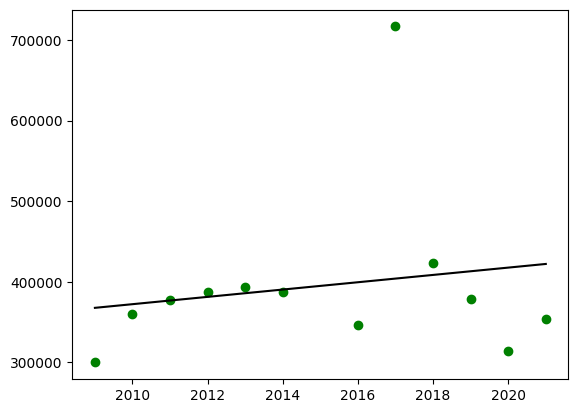

In [6]:
import matplotlib.pyplot as plt
plt.scatter((births.index.values).reshape(-1,1), (births.Asistencia_Recibida.values).reshape(-1,1),color='g')
plt.plot((births.index.values).reshape(-1,1), reg.predict((births.index.values).reshape(-1,1)),color='k')

plt.show()

In [7]:
df2 = df.loc[df["Edad_Madre"] <= 99 ]
df2 = df2.loc[df["Edad_Padre"] <= 99 ]
X_train, X_test, y_train, y_test = train_test_split(df2["Edad_Madre"], df2["Edad_Padre"], test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train.array.reshape(-1, 1), y_train.array.reshape(-1, 1))

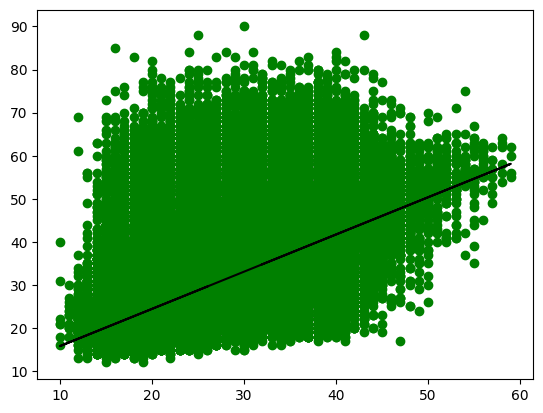

In [8]:
pred = reg.predict(X_test.array.reshape(-1, 1))
plt.scatter(X_test,y_test,color='g')
plt.plot(X_test, pred,color='k')

plt.show()

In [9]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)

print("R2 score:", r2)

R2 score: 0.49789245114350333


c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

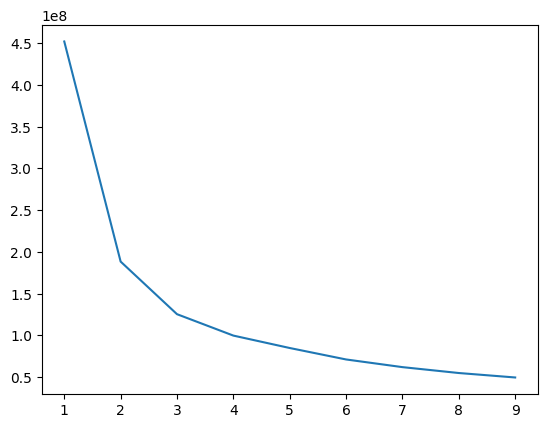

In [10]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = df2[["Edad_Madre", "Edad_Padre"]]
sse = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i , max_iter=300)
    kmeans.fit(X)  # <- fit here.....
    sse.append(kmeans.inertia_)

plt.plot(range(1,10),sse)
plt.show() 

c:\Users\rober\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


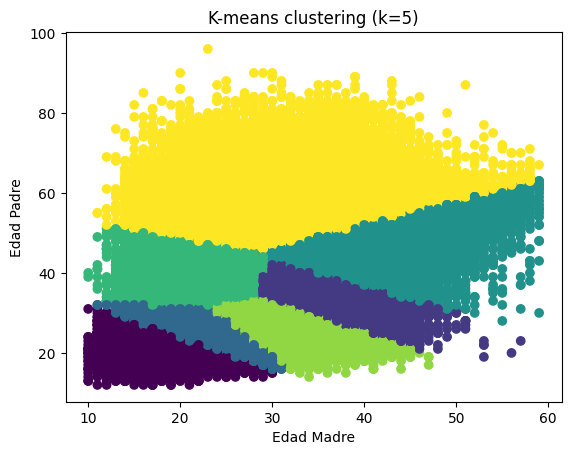

In [13]:
kmeans = KMeans(n_clusters=7, \
                    init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X["Edad_Madre"], X["Edad_Padre"], c=y_kmeans)
plt.title('K-means clustering (k={})'.format(5))
plt.xlabel('Edad Madre')
plt.ylabel('Edad Padre')
plt.show()